# 클래스 불균형 문제

- 불균형 되어 있는 순간, 이 모델 입장에서는 다수 클래스로 많이 판별하는게 이득. 그렇게 학습될 가능성이 매우 큼. 

![5_20.png](../materials/5_20.png)

![5_20.png](../materials/5_21.png)

대부분 분류 모형이 정확도만 최대화 하려고 함. 때문에, 효율적으로 분류하다 보면 이런 문제들이 매우 자주 발생함. 

![5_20.png](../materials/5_22.png)

- 위 두 경우의 경우 대부분의 모델은 왼쪽이 좋다고 판단한다. 
- 하지만, 상황에 따라 그렇지 않은 경우도 있다. 

![5_20.png](../materials/5_23.png)

위처럼 꼭 불균형 된다고 해서, 꼭 안좋은 모델이 나오는 것만도 아니다. 

## KNN for diagnose Class Imbalance

![5_20.png](../materials/5_24.png)

K-nearest는 클래스 불균형에 매우 민감하다. 
- 때문에, 클래스 불균형 문제가 있는 경우에는 사용하면 안되는 모델이지만, 
- 역으로 활용해서 **클래스 불균형 문제를 테스트** 하는데 쓸 수 있다. 
- K-Nearest에서 K가 클수록 민감해진다. 
    - 당연히 그렇겠지. 
    - 극단적으로 소수 샘플이 10개밖에 없는데, K값을 21로 잡았다면? 그럼 무슨 짓을 해도, 소수 클래스 군집이 될 수가 없음. 
    - K=11을 많이 선호한다. 

![5_20.png](../materials/5_25.png)

기본적인 아이디어는, 최대한 소수 클래스로 분류하려는 시도임. 
- 위에 보면, 어느정도 정확도를 손해봤지. 결국 그렇게 해보겠다는거야. 
- 그런데 이론적으로 그렇다는 거고, 같이 오르는 경우도 있고 케이스 매우 다양하다. 

# Re-Sampling
## Over Sampling and Under Sampling

- [datascienceschoo.net](https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html?highlight=smote)
- [saanghyuk github](https://github.com/saanghyuk/0B-python/blob/master/data_analysis/5_10_Model_Optimization.ipynb)
- Test Data에는 절대 쓰는 것 아니다. 

![5_27.png](../materials/5_27.png)

![5_27.png](../materials/5_28.png)

- SMOTE는 소수만 돈다. 
- 이웃 K개를 바라본다. 
- 이웃 가운데 하나를 랜덤하게 선택한다. 
- 그 선택된 이웃과 나 사이 정중앙에 샘플을 생성한다. 


DTSCHOOL에서 나온 방식은
- 마이너인 데이터를 싹다 돌면서 데이터를 하나 고르고, 주변 neighborhood를 찾는다. 보통은 KNN으로 찾는다.
- 예를 들어 KNN에서 K=3이면, 마이너중에 하나 고르고 가장 가까운 동료 마이너를 3개 찾는다. 그 3개를 조합해서 새로운 데이터를 하나 만든다.
- 그 다음 마이너 골라서 똑같이 해서 또 데이터 만든다. 이렇게 반복하는 과정.
- 즉, 모든 데이터를 돌면서 업샘플을 하는 과정이다.

찾아보니깐, 위 방법(DT말고 여기서 나온 방법)이 맞는듯. 

![5_27.png](../materials/5_29.png)

![5_27.png](../materials/5_30.png)

**fit_resample**로 바뀌었음. 

- 보통 5:5로 하긴 하는데, 그렇게 하면 재현율이 너무 오르고 정확도 너무 떨어지는 경우도 많다. 
- 다수:소수가 보통 3:1, 4:1 정도 되게 만들어 보자. 

- 아래는 파란색이 다수, 빨간색이 소수인 상황. 
- 언더샘플링이니깐, 파란색을 제거해야 하는 상황. 
- 모든 파란색 샘플에서, 가장 가까운 n개의 소수 클래스까지의 거리를 평균친다. 
- 그게 짧은 애부터 날린다. 
- 보통은 그냥 n을 전체 소수 클래스 갯수로 써버린다. 

![5_27.png](../materials/5_31.png)

![5_27.png](../materials/5_32.png)

1. NearMiss – Version 1 : It selects samples of the majority class for which average distances to the k closest instances of the minority class is smallest.
2. NearMiss – Version 2 : It selects samples of the majority class for which average distances to the k farthest instances of the minority class is smallest.
3. NearMiss – Version 3 : It works in 2 steps. Firstly, for each minority class instance, their M nearest-neighbors will be stored. Then finally, the majority class instances are selected for which the average distance to the N nearest-neighbors is the largest.
    - Version 3 is different. This version will pick balanced clusters of points that are closest to outlier points from other classes, instead of building giant blob(s) around one or a handful of such points.
    - 요약하자면, 그냥 소수 클래스 근처에 있는 애들은 남기고, 다수 클래스인데 멀리 떨어져있는 애들은 날린다는 것. 

### Over Sampling Practice

In [3]:
import pandas as pd
import os

os.chdir(r"/Users/sanghyuk/Documents/preprocessing_python/lecture_source/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/")

In [7]:
df = pd.read_csv("Secom.csv")

In [8]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [9]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [10]:
# 특징이 매우 많음을 확인
Train_X.shape

(1175, 590)

In [11]:
# 클래스 불균형 확인 => 언더샘플링을 적용하기에는 부적절 
Train_Y.value_counts()

-1    1101
 1      74
Name: Y, dtype: int64

In [12]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

14.878378378378379

실제로도 class imbalance 문제가 있으면, recall이 거의 0에 가깝게 나옴. 

In [14]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율이 0%로 불균형이 심각한 수준이라 보임

0.0
0.923469387755102


In [16]:
from imblearn.over_sampling import SMOTE
# SMOTE 인스턴스 생성
oversampling_instance = SMOTE(k_neighbors = 3)

# 오버샘플링 적용
o_Train_X, o_Train_Y = oversampling_instance.fit_resample(Train_X, Train_Y)

# ndarray 형태가 되므로 다시 DataFrame과 Series로 변환 (남은 전처리가 없다면 하지 않아도 무방)
o_Train_X = pd.DataFrame(o_Train_X, columns = X.columns)
o_Train_Y = pd.Series(o_Train_Y)

In [17]:
# 비율이 1:1이 됨을 확인
o_Train_Y.value_counts()

 1    1101
-1    1101
Name: Y, dtype: int64

In [18]:
# 같은 모델로 다시 평가: 정확도는 감소했으나, 재현율이 크게 오름을 확인
kNN_model = KNN(n_neighbors = 11).fit(o_Train_X, o_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.5333333333333333
0.6071428571428571


아까 0과 비교하면, 굉장히 많이 올랐음. accuracy희생도 컸음. <br>
비율을 1:1말고, 2:1 정도로 다시 조정해보자. 

In [21]:
from imblearn.over_sampling import SMOTE
# SMOTE 인스턴스 생성
oversampling_instance = SMOTE(k_neighbors = 3, sampling_strategy = {1:int(Train_Y.value_counts().iloc[0] / 2),
                                                                    -1:Train_Y.value_counts().iloc[0]})

# 오버샘플링 적용
o_Train_X, o_Train_Y = oversampling_instance.fit_resample(Train_X, Train_Y)

# ndarray 형태가 되므로 다시 DataFrame과 Series로 변환 (남은 전처리가 없다면 하지 않아도 무방)
o_Train_X = pd.DataFrame(o_Train_X, columns = X.columns)
o_Train_Y = pd.Series(o_Train_Y)

In [22]:
kNN_model = KNN(n_neighbors = 11).fit(o_Train_X, o_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.43333333333333335
0.7193877551020408


### Under Sampling Practice

In [24]:
import pandas as pd
import os

os.chdir(r"/Users/sanghyuk/Documents/preprocessing_python/lecture_source/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/")

In [25]:
df = pd.read_csv("page-blocks0.csv")

In [26]:
# 특징과 라벨 분리
X = df.drop('Class', axis = 1)
Y = df['Class']

In [27]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [28]:
# 클래스 불균형 확인
Train_Y.value_counts()

negative    3688
positive     416
Name: Class, dtype: int64

In [29]:
Train_Y.replace({"negative":-1, "positive":1}, inplace = True)
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

In [30]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

8.865384615384615

이 정도도 꽤 심각한 수준이라고 볼 수 있다. 

In [31]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율이 60%로 불균형이 심각한 수준은 아니라고 보임

0.6433566433566433
0.9546783625730995


아까에 비하면, 나쁘지는 않은데? 

In [33]:
from imblearn.under_sampling import NearMiss
NM_model = NearMiss(version = 2) 

# NearMiss 적용
u_Train_X, u_Train_Y = NM_model.fit_resample(Train_X, Train_Y)
u_Train_X = pd.DataFrame(u_Train_X, columns = X.columns)
u_Train_Y = pd.Series(u_Train_Y)

In [34]:
NM_model.get_params()

{'n_jobs': None,
 'n_neighbors': 3,
 'n_neighbors_ver3': 3,
 'sampling_strategy': 'auto',
 'version': 2}

In [35]:
u_Train_Y.value_counts()

 1    416
-1    416
Name: Class, dtype: int64

In [36]:
# kNN 재적용을 통한 성능 변화 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(u_Train_X, u_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율은 크게 올랐으나, 정확도가 크게 떨어짐 => 적당한 비율에 맞게 설정해야 함

0.9090909090909091
0.22587719298245615


정확도가 무슨 22%가 되네. 

In [39]:
from imblearn.under_sampling import NearMiss
NM_model = NearMiss(version = 2, sampling_strategy = {1:u_Train_Y.value_counts().iloc[-1],
                                                      -1:u_Train_Y.value_counts().iloc[-1] * 5}) # 5:1 정도의 비율로 언더샘플링 재수행

u_Train_X, u_Train_Y = NM_model.fit_resample(Train_X, Train_Y)
u_Train_X = pd.DataFrame(u_Train_X, columns = X.columns)
u_Train_Y = pd.Series(u_Train_Y)

In [40]:
u_Train_Y.value_counts()

-1    2080
 1     416
Name: Class, dtype: int64

In [41]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(u_Train_X, u_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.8321678321678322
0.6615497076023392


# 비용 민감 모델

- 학습 목적식이 정확도만을 최대화 하는 것을 방지하기 위한 모델. 
- 엄밀히 따지면, 데이터 전처리 라기 보다는 모델의 학습목적식을 변형하는 것. 
- 일반 모델에서는 Recall과 Precision을 같게 취급함. 
- 그러나, 암판별과 같이 Recall이 훨씬 더 중요한 경우들이 실제로 많다.  
- 하단 식에서, W를 크게 한다면, 위음성 비용을 줄이겠다는 것이겠지. Recall올리겠다는 것.
    - W를 크게 한다는 것은, recall에 따르는 비용을 크게 먹이겠다는 것이고, recall을 최대한 좋게 만들겠다는 것. 
        - Recall을 좋게 만들려면, 기준을 넉넉하게 줘야 함. 정확도는 그만큼 떨어질 수 밖에 없다. 
    - Recall을 올리겠다는 것? 가능하면 소수 클래스로 분류하겠다는 것. 
    - W가 커질수록 정확도가 많이 희생된다. 
    - 애초에 W가 0에서 정확도가 제일 높아. Why? 애초에 다수가 하나면 그냥 전부 다 부정 클라스로 분류해도, 정확도는 좋아. 

![5_33.png](../materials/5_33.png)

확률 모델은 모델의 목적식 자체를 변하게 하는 것이 아닌, 결과만 바꾼다. 
- 확률 모델에서는 cut-off value/threshold를 조절한다. 
- 맨 처음에 C를 보통 0.5로 두잖아. 
- C를 작게 둘수록, 긍정으로 많이 분류 한다. 긍정으로 많이 분류한다는 것은 원래에 비해 긍정 클래스 공간이 더 넓어진다는 뜻. 
- 그러면, recall은 올라가면서 정확도는 희생되겠지. 
- 반대로도 똑같이 현재는 소수가 거의 없고 대부분 다수인 상황이니깐, C값을 올려서 점점 긍정을 적게 판단할수록 정확도는 올라가는 패턴을 보인다. 

![5_33.png](../materials/5_34.png)

모델 다 학습된 다음에 쓰는 것이라서, predict_proba를 사용하는 것. 
- 확률을 출력 받아서, 직접 나누면 된다. 

![5_33.png](../materials/5_35.png)

![5_33.png](../materials/5_36.png)

내 추론으로는 아래처럼 비용민감 서포트벡터 머신을 만들려면, 총 3가지가 필요할 듯. 
- 위음성인 경우 Cost
- 위양성인 경우 Cost
- 둘다 아니고 Just Margin Violation에 대한 Cost


So high weights mean less regularization for the class and a higher incentive for the svm to classify it properly.
- [SVC misclassified](https://chrisalbon.com/code/machine_learning/support_vector_machines/imbalanced_classes_in_svm/)
- C를 class별로 나누겠다는 것. 
- 다수 클래스가 Support Vector 침범했을때(반대편으로 넘어갔든, 그냥 Margin Violation을 했든) 조금 작게 하고, 소수 클래스가 Support Vector 침범하면, 비용을 크게 두겠다는 것. 

![5_33.png](../materials/5_37.png)

KNN, Random Forest등 아래 방법 다 쓸 수 있음. 

![5_33.png](../materials/5_38.png)

![5_33.png](../materials/5_39.png)

### Cut-off Value 조정

확률 모델에 대한 비용민감 모델

In [43]:
import pandas as pd
import os

os.chdir(r"/Users/sanghyuk/Documents/preprocessing_python/lecture_source/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/")

In [44]:
df = pd.read_csv("Secom.csv")

In [45]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [46]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [47]:
# 특징이 매우 많음을 확인
Train_X.shape

(1175, 590)

In [48]:
# 클래스 불균형 확인
Train_Y.value_counts()

-1    1093
 1      82
Name: Y, dtype: int64

In [49]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

13.329268292682928

In [50]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율이 0%로 불균형이 심각한 수준이라 보임

0.0
0.9438775510204082


In [51]:
# 비용 민감 모델 적용전 Logistic Regression 모델 테스트
from sklearn.linear_model import LogisticRegression as LR
model = LR(max_iter = 100000).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.18181818181818182
0.9030612244897959


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
model.classes_

array([-1,  1])

In [53]:
# cut off value를 조정
probs = model.predict_proba(Test_X)
probs = pd.DataFrame(probs, columns = model.classes_)

cut_off_value = 0.3

pred_Y = 2 * (probs.iloc[:, -1] >= cut_off_value) - 1
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.2727272727272727
0.8826530612244898


In [55]:
probs.head()

,-1,1
0,0.999981,1.856708e-05
1,0.785780,2.142196e-01
2,0.854483,1.455170e-01
3,1.000000,9.347631e-08
4,0.989749,1.025090e-02


In [58]:
# cut off value를 조정하는 함수 작성
def cost_sensitive_model(model, cut_off_value, Test_X, Test_Y):
    probs = model.predict_proba(Test_X)
    probs = pd.DataFrame(probs, columns = model.classes_)
    pred_Y = 2 * (probs.iloc[:, -1] >= cut_off_value) - 1
    recall = recall_score(Test_Y, pred_Y)
    accuracy = accuracy_score(Test_Y, pred_Y)
    return recall, accuracy

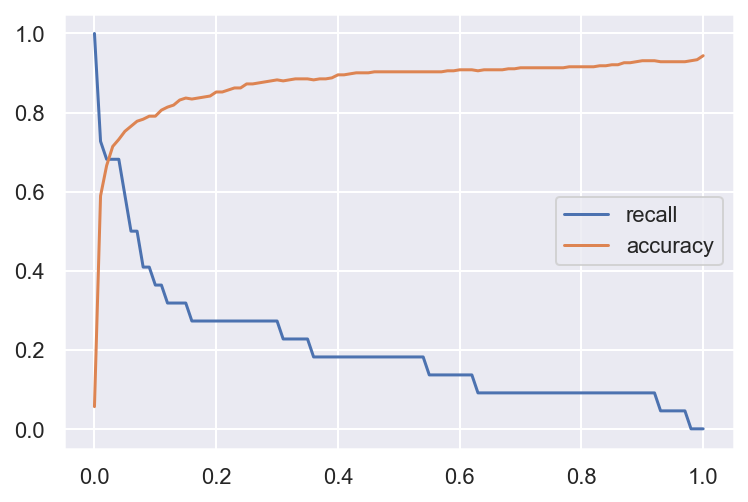

In [59]:
# cut off value에 따른 recall과 accuracy 변화 확인
from matplotlib import pyplot as plt
import numpy as np

cut_off_value_list = np.linspace(0, 1, 101)
recall_list = []
accuracy_list = []

for c in cut_off_value_list:
    recall, accuracy = cost_sensitive_model(model, c, Test_X, Test_Y)
    recall_list.append(recall)
    accuracy_list.append(accuracy)

%matplotlib inline    
plt.plot(cut_off_value_list, recall_list, label = 'recall')   
plt.plot(cut_off_value_list, accuracy_list, label = 'accuracy')    
plt.legend()

거의 `0` 가까이에서 cut-off를 골라야 하네. 

### Class weight 조정

In [60]:
import pandas as pd
import os

os.chdir(r"/Users/sanghyuk/Documents/preprocessing_python/lecture_source/5. 머신러닝 모델의 성능 향상을 위한 전처리/데이터/")

In [61]:
df = pd.read_csv("page-blocks0.csv")

In [62]:
# 특징과 라벨 분리
X = df.drop('Class', axis = 1)
Y = df['Class']

In [63]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [64]:
# 클래스 불균형 확인 => 오버/언더샘플링을 적용하기에는 부적절 
Train_Y.value_counts()

negative    3662
positive     442
Name: Class, dtype: int64

In [65]:
Train_Y.replace({"negative":-1, "positive":1}, inplace = True)
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

In [66]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

8.285067873303168

In [67]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율이 58%로 불균형이 심각한 수준은 아니라고 보임

0.5897435897435898
0.9532163742690059


In [68]:
from sklearn.svm import SVC

In [69]:
model = SVC().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.08547008547008547
0.9210526315789473


In [74]:
Train_Y.value_counts()

-1    3662
 1     442
Name: Class, dtype: int64

In [75]:
#-1을 1, 1을 8만큼의 가중치를 주는 dictionary

class_weight = {1:8, -1:1}

In [70]:
# 클래스 웨이트 조정
model = SVC(class_weight = {1:8, -1:1}).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.9316239316239316
0.6308479532163743


In [71]:
# 클래스 웨이트 조정
model = SVC(class_weight = 'balanced').fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.9401709401709402
0.5723684210526315
